In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [54]:
PROJECT_PATH = '../'
DATA_PATH = '/scratch/ceph/swei20/data/ae/dataset/test'
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
sys.path.insert(0, PROJECT_PATH)

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [6]:
import tensorflow as tf
# tf.enable_v2_behavior()
gpus = tf.config.list_physical_devices('GPU') 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Loading Data

In [55]:
with h5py.File(PCA_PATH, 'r') as f:
    flux = f['flux'][()]

In [56]:
def prepro_pca(flux, dim=300):
    flux0 = flux.reshape(-1, 1000)[:, :dim]    
    flux_clean = flux0[~np.isnan(flux0[:,0])]    
    print(flux_clean.shape, flux0.shape)
    print('min', flux_clean.min(), 'max', flux_clean.max(),'mean', flux_clean.mean(),'std', flux_clean.std() )
    return flux_clean

In [57]:
flux1 = prepro_pca(flux, dim=300)

(116614, 300) (243936, 300)
min -184.9254058126797 max 145.24091665337806 mean -0.10353327716635463 std 2.4000601615265493


In [47]:
def get_mean_norm_data(x):
    mean = np.median(x, axis=0)
    std = np.std(x, axis=0)
    print(mean.shape)
    x  = (x - mean) / std
    return x, mean, std

In [48]:
flux_mean, mean, std = get_mean_norm_data(flux1)

(300,)


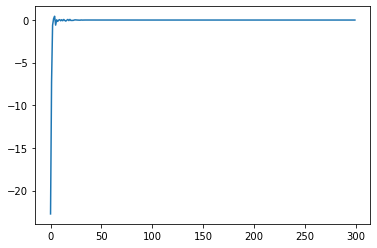

In [40]:
plt.plot(mean)

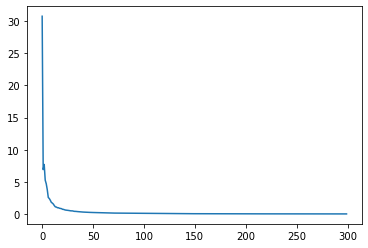

In [41]:
plt.plot(std)

In [50]:
DATA_PATH = "/home/swei20/AE/data"
SAVE_PATH = os.path.join(DATA_PATH, 'pca.h5')

In [31]:
SAVE_PATH

'/scratch/ceph/swei20/data/ae/dataset/test/pca.h5'

In [52]:
with h5py.File(SAVE_PATH, 'w') as f:
    f.create_dataset('flux300ms', data = flux_mean)
#     f.create_dataset('flux10kmm', data = flux10kmm)

In [59]:
with h5py.File(SAVE_PATH, 'a') as f:
    f.create_dataset('flux', data = flux1)
#     f.create_dataset('flux10kmm', data = flux10kmm)

In [27]:
with h5py.File(fn, 'r') as f:
    flux10kmm = f['flux10kmm'][()]
#     flux10kmm = f['flux10kmm'][()]

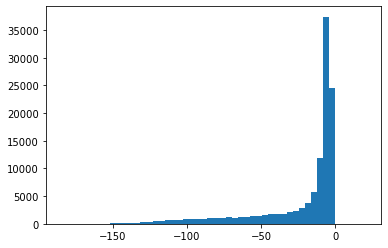

In [64]:
_ = plt.hist(flux1[:,0], bins = 50)

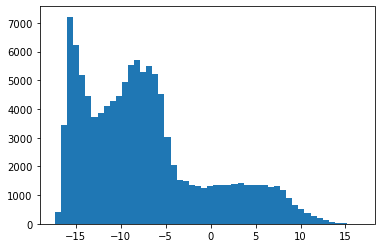

In [63]:
_ = plt.hist(flux1[:,1], bins = 50)

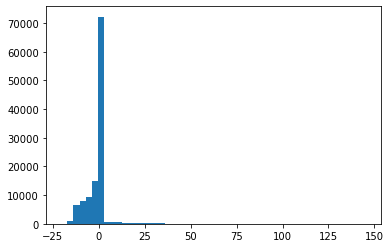

In [65]:
_ = plt.hist(flux1[:,2], bins = 50)

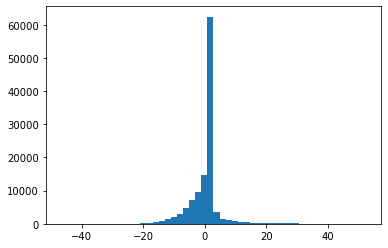

In [66]:
_ = plt.hist(flux1[:,3], bins = 50)

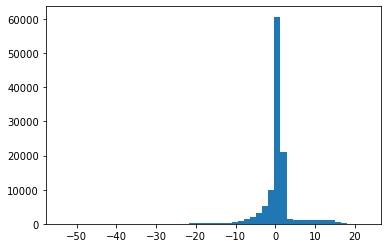

In [67]:
_ = plt.hist(flux1[:,4], bins = 50)

In [69]:
flux1.shape

(116614, 300)

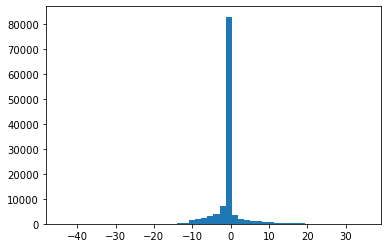

In [68]:
_ = plt.hist(flux1[:,5], bins = 50)

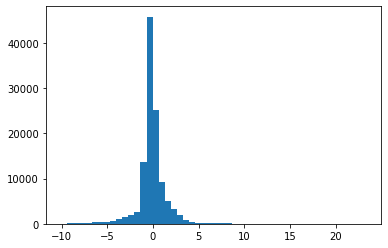

In [70]:
_ = plt.hist(flux1[:,10], bins = 50)

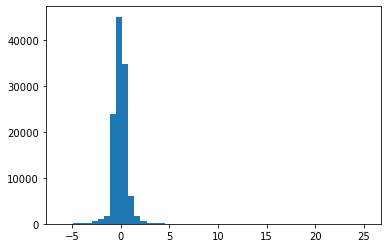

In [71]:
_ = plt.hist(flux1[:,20], bins = 50)

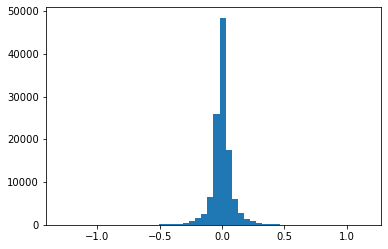

In [61]:
_ = plt.hist(flux1[:,100], bins = 50)

## AE

In [10]:
from dotmap import DotMap

In [11]:
config_dict = {
    "data": {
      "dir": "/scratch/ceph/swei20/data/ae/dataset/test",
      "filename": "pca.h5",
      "train": "flux300",
      "test": None
    },
    "model":{
      "name": "SimpleAE",
      "input_dim": 300,
      "latent_dim": 8,
      "hidden_dims": [64],
      "dropout": 0.2,
      "lr": 0.001,
      "reg1": 0.0,
      "loss": "mae",
      "opt": "adam"
    },
    "trainer":{
      "epoch": 20,
      "batch_size": 32,
      "validation_split":0.1,
      "verbose_training": 1
    },
    "callbacks":{
        "checkpoint_monitor": "val_loss",
        "checkpoint_mode": "min"
    }
}

In [12]:
config = DotMap(config_dict)

In [15]:
from ae.model.simple_ae_model import SimpleAEModel

In [16]:
mm = SimpleAEModel()

In [17]:
mm.build_model(config)

[300, 64, 8]


In [18]:
from ae.trainer.simple_ae_trainer import SimpleAETrainer

In [19]:
tt = SimpleAETrainer(mm, config)

In [20]:
data = (flux1, flux1)

In [21]:
history = tt.train(data, ep=100)

Epoch 1/100
3280/3280 [==============================] - 9s 2ms/step - loss: 0.1354 - acc: 0.5323 - val_loss: 0.1587 - val_acc: 0.4897
Epoch 2/100
3280/3280 [==============================] - 7s 2ms/step - loss: 0.1046 - acc: 0.6640 - val_loss: 0.1503 - val_acc: 0.5792
Epoch 3/100
3280/3280 [==============================] - 6s 2ms/step - loss: 0.1013 - acc: 0.6871 - val_loss: 0.1468 - val_acc: 0.6320
Epoch 4/100
3280/3280 [==============================] - 6s 2ms/step - loss: 0.0994 - acc: 0.6986 - val_loss: 0.1443 - val_acc: 0.6223
Epoch 5/100
3280/3280 [==============================] - 7s 2ms/step - loss: 0.0982 - acc: 0.7082 - val_loss: 0.1422 - val_acc: 0.6470
Epoch 6/100
3280/3280 [==============================] - 6s 2ms/step - loss: 0.0972 - acc: 0.7167 - val_loss: 0.1437 - val_acc: 0.6382
Epoch 7/100
3280/3280 [==============================] - 6s 2ms/step - loss: 0.0964 - acc: 0.7216 - val_loss: 0.1416 - val_acc: 0.6240
Epoch 8/100
3280/3280 [==============================] 